# Libraries

In [1]:
import pickle
import pandas as pd
import spacy
from tqdm.notebook import tqdm
import numpy as np
import warnings

from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
import gensim

import matplotlib.pyplot as plt

# Import

In [193]:
len(lda.get_topics())

50

In [178]:
lda = LdaMallet.load("Models/lda_10000i")

In [194]:
N_TOPICS = len(lda.get_topics())
top_10 = []
for topic in range(N_TOPICS):
    words = lda.show_topic(topic, 10)
    topic_n_words = ', '.join([word[0] for word in words])
    temp_top_10 = 'Topic {}: {}'.format(str(topic), topic_n_words)
    top_10.append(temp_top_10)
top_10[:5]

['Topic 0: today, tonight, p.m., open, cloudy, pm, special, chance, Forecast, tomorrow',
 'Topic 1: year, plan, cancel, wedding, celebrate, happen, event, celebration, hold, big',
 'Topic 2: find, place, visit, today, favorite, bring, sign, pandemic, spot, covid-19',
 'Topic 3: good, feel, thing, make, bad, happen, situation, lot, guy, suck',
 'Topic 4: covid, play, season, team, game, ready, dog, fall, win, big']

In [53]:
all_data = pd.read_csv("Data/all_data_topic_sentiment.csv", index_col=0)
all_data.head()

,date,id,tweet,sentiment,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,...,normalized_topic_40_sentiment,normalized_topic_41_sentiment,normalized_topic_42_sentiment,normalized_topic_43_sentiment,normalized_topic_44_sentiment,normalized_topic_45_sentiment,normalized_topic_46_sentiment,normalized_topic_47_sentiment,normalized_topic_48_sentiment,normalized_topic_49_sentiment
0,march20_march21,1.240728e+18,Many ask us how they can support us during all...,0.136364,0.017544,0.017544,0.035088,0.017544,0.017544,0.017544,...,-0.000335,-0.000335,-0.000335,-0.000335,-0.000335,0.006842,-0.000335,-0.000335,-0.000335,-0.000335
1,march20_march21,1.240728e+18,We wish that ceramic coating protected us from...,0.000000,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,march20_march21,1.240728e+18,I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...,0.275000,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,...,-0.000675,-0.000675,0.013798,-0.000675,-0.000675,-0.000675,-0.000675,-0.000675,-0.000675,-0.000675
3,march20_march21,1.240729e+18,"Day 3.... Corona-0, QueRona-3! Workout complet...",0.000000,0.017241,0.017241,0.017241,0.017241,0.034483,0.017241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,march20_march21,1.240729e+18,Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,-0.137879,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,...,-0.002080,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339


### Only select the first columns and topic proportions

In [144]:
topic_columns = ["topic_"+str(i) for i in range(50)]
columns = ['date', 'id', 'tweet', 'sentiment'] + topic_columns
all_data_topics = all_data[columns]
all_data_topics.head(2)

,date,id,tweet,sentiment,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,march20_march21,1.240728e+18,Many ask us how they can support us during all...,0.136364,0.017544,0.017544,0.035088,0.017544,0.017544,0.017544,...,0.017544,0.017544,0.017544,0.017544,0.017544,0.070175,0.017544,0.017544,0.017544,0.017544
1,march20_march21,1.240728e+18,We wish that ceramic coating protected us from...,0.000000,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667


In [145]:
day_columns = ['date', 'sentiment'] + topic_columns

# Get topic sentiment
### SUM(topic_proportion * sentiment) / SUM(topic_proportion)

Multiply sentiment with topic proportions

In [149]:
for topic in topic_columns:
    all_data_topics[topic + "_times_sentiment"] = all_data_topics["sentiment"] * all_data_topics[topic]

# means per day
day_data_means = all_data_topics.groupby("date", sort=False).mean().reset_index()[day_columns]

# sums per day
day_data_sums = all_data_topics.groupby("date", sort=False).sum().reset_index() 

# SUM(topic_proportion * sentiment) / SUM(topic_proportion)
for topic in topic_columns:
    day_data_means[topic+"_sentiment"] = day_data_sums[topic+"_times_sentiment"]/day_data_sums[topic]
day_data_means.head()

<ipython-input-149-9e2488d1edcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_topics[topic + "_times_sentiment"] = all_data_topics["sentiment"] * all_data_topics[topic]


,date,sentiment,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_40_sentiment,topic_41_sentiment,topic_42_sentiment,topic_43_sentiment,topic_44_sentiment,topic_45_sentiment,topic_46_sentiment,topic_47_sentiment,topic_48_sentiment,topic_49_sentiment
0,march20_march21,0.130727,0.020365,0.018904,0.019117,0.020082,0.019522,0.018837,0.020213,0.024148,...,0.130875,0.125046,0.127852,0.130579,0.128222,0.129242,0.120922,0.128956,0.130570,0.126651
1,march21_march22,0.202211,0.020426,0.018774,0.019645,0.020172,0.018995,0.018726,0.019713,0.023243,...,0.200001,0.199409,0.203671,0.205700,0.209466,0.205473,0.198384,0.201193,0.199111,0.201329
2,march22_march23,0.062982,0.021426,0.018871,0.019310,0.020581,0.019428,0.018942,0.019608,0.024534,...,0.060855,0.069694,0.062592,0.079955,0.065916,0.062267,0.071120,0.062462,0.063709,0.065679
3,march23_march24,0.114953,0.019405,0.018744,0.019197,0.019654,0.019078,0.018519,0.019481,0.023939,...,0.121163,0.113431,0.116066,0.113882,0.117575,0.110494,0.121015,0.117766,0.114335,0.108548
4,march24_march25,0.059909,0.019213,0.018344,0.019251,0.020275,0.019176,0.018845,0.019923,0.023923,...,0.059477,0.073634,0.071399,0.051695,0.055625,0.055375,0.041763,0.068371,0.057203,0.060496


# Plotting these sentiment scores result in a recurrent sentiment plot (orange)

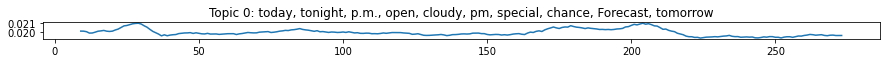

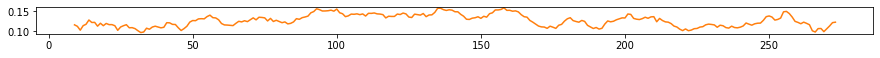

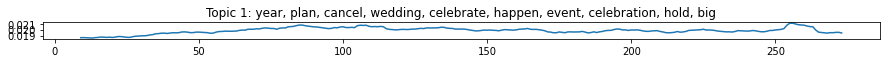

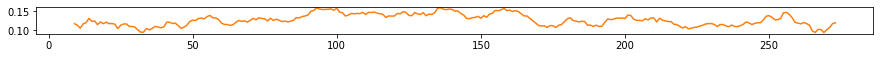

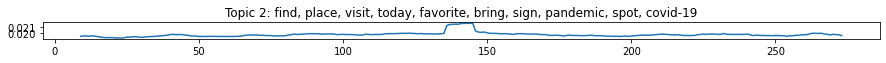

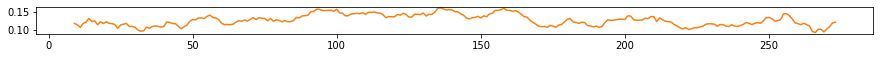

In [187]:
data = day_data_means
for i, topic in enumerate(topic_columns[:3]):
    plt.figure(figsize=(15,0.3))
    plt.plot(data[topic].rolling(10).mean(), c="C0")
    plt.title(top_10[i])
    plt.show()
    
    plt.figure(figsize=(15,0.5))
    plt.plot(data[topic+"_sentiment"].rolling(10).mean(), c="C1")
    plt.show()

# We currently think this is because of the topic distribution output by the LDA model

In [134]:
i=0

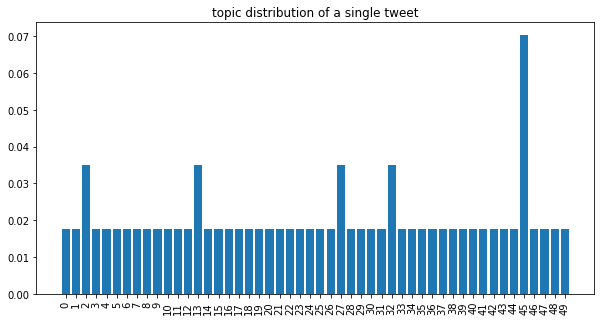

In [135]:
plt.figure(figsize=(10,5))
plt.bar(topic_columns, all_data_topics[topic_columns].iloc[i])
plt.xticks(np.arange(50), np.arange(50), rotation="vertical")
plt.title("topic distribution of a single tweet")
i+=1

It is seems that it uses a lower bound, which makes the "topic_proportion * sentiment" really similar for each topic in a tweet

One way of solving this, is subtracting the mean, or substracting the minimal value and normalize it bach to a sum of 1 again. The latter I do below:

# Correct by subtracting the lower bound and scale back to a sum of one

In [139]:
min_subtracted = all_data_topics[topic_columns].subtract(all_data_topics[topic_columns].min(axis=1), axis=0)
min_subtracted_sum = min_subtracted.sum(axis=1)
corrected = min_subtracted.divide(min_subtracted_sum, axis=0)

In [140]:
corrected.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,0.0,0.0,0.142857,0.0,0.000,0.0,0.0,0.000000,0.000,0.0,...,0.000000,0.0,0.000000,0.000,0.000,0.428571,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.100000,0.000,0.0,...,0.000000,0.0,0.000000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000,0.0,...,0.000000,0.0,0.428571,0.000,0.000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.125,0.0,0.0,0.000000,0.125,0.0,...,0.000000,0.0,0.000000,0.125,0.125,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.142857,0.000,0.0,...,0.142857,0.0,0.000000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0


original


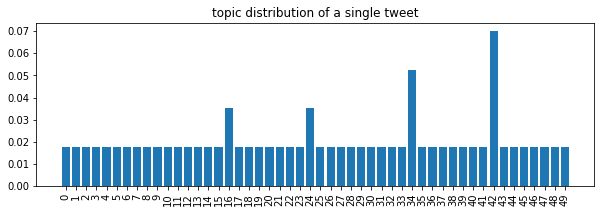

corrected


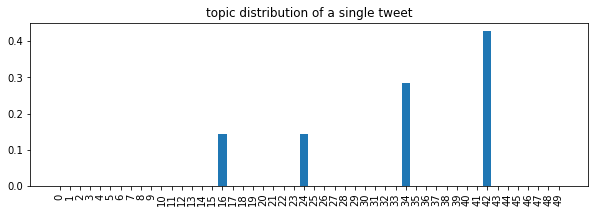

In [143]:
print("original")
plt.figure(figsize=(10,3))
plt.bar(topic_columns, all_data_topics[topic_columns].iloc[i])
plt.xticks(np.arange(50), np.arange(50), rotation="vertical")
plt.title("topic distribution of a single tweet")
plt.show()

print("corrected")
plt.figure(figsize=(10,3))
plt.bar(topic_columns, corrected[topic_columns].iloc[i])
plt.xticks(np.arange(50), np.arange(50), rotation="vertical")
plt.title("topic distribution of a single tweet")
plt.show()

# Get corrected topic sentiment 
### SUM(topic_proportion * sentiment) / SUM(topic_proportion)

In [159]:
c_topics = ["c_" + topic for topic in topic_columns]
corrected.columns = c_topics


In [163]:
all_data_topics_c = pd.concat([all_data_topics[["date", "id", "tweet", "sentiment"]], corrected], axis=1)
all_data_topics_c.head()

,date,id,tweet,sentiment,c_topic_0,c_topic_1,c_topic_2,c_topic_3,c_topic_4,c_topic_5,...,c_topic_40,c_topic_41,c_topic_42,c_topic_43,c_topic_44,c_topic_45,c_topic_46,c_topic_47,c_topic_48,c_topic_49
0,march20_march21,1.240728e+18,Many ask us how they can support us during all...,0.136364,0.0,0.0,0.142857,0.0,0.000,0.0,...,0.000000,0.0,0.000000,0.000,0.000,0.428571,0.0,0.0,0.0,0.0
1,march20_march21,1.240728e+18,We wish that ceramic coating protected us from...,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,...,0.000000,0.0,0.000000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0
2,march20_march21,1.240728e+18,I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...,0.275000,0.0,0.0,0.000000,0.0,0.000,0.0,...,0.000000,0.0,0.428571,0.000,0.000,0.000000,0.0,0.0,0.0,0.0
3,march20_march21,1.240729e+18,"Day 3.... Corona-0, QueRona-3! Workout complet...",0.000000,0.0,0.0,0.000000,0.0,0.125,0.0,...,0.000000,0.0,0.000000,0.125,0.125,0.000000,0.0,0.0,0.0,0.0
4,march20_march21,1.240729e+18,Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,-0.137879,0.0,0.0,0.000000,0.0,0.000,0.0,...,0.142857,0.0,0.000000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0


In [166]:
for topic in c_topics:
    all_data_topics_c[topic + "_times_sentiment"] = all_data_topics_c["sentiment"] * all_data_topics_c[topic]

# means per day
day_data_means_c = all_data_topics_c.groupby("date", sort=False).mean().reset_index()[["date", "sentiment"]+c_topics]

# sums per day
day_data_sums_c = all_data_topics_c.groupby("date", sort=False).sum().reset_index() 

# SUM(topic_proportion * sentiment) / SUM(topic_proportion)
for topic in c_topics:
    day_data_means_c[topic+"_sentiment"] = day_data_sums_c[topic+"_times_sentiment"]/day_data_sums_c[topic]
day_data_means_c.head()

,date,sentiment,c_topic_0,c_topic_1,c_topic_2,c_topic_3,c_topic_4,c_topic_5,c_topic_6,c_topic_7,...,c_topic_40_sentiment,c_topic_41_sentiment,c_topic_42_sentiment,c_topic_43_sentiment,c_topic_44_sentiment,c_topic_45_sentiment,c_topic_46_sentiment,c_topic_47_sentiment,c_topic_48_sentiment,c_topic_49_sentiment
0,march20_march21,0.130727,0.022765,0.010625,0.011743,0.019736,0.015923,0.009911,0.024597,0.059338,...,0.145907,0.073349,0.087173,0.121674,0.101412,0.118772,0.072805,0.100106,0.138520,0.055265
1,march21_march22,0.202211,0.024211,0.009228,0.015288,0.020776,0.009867,0.009765,0.019399,0.052648,...,0.161756,0.166847,0.195616,0.181916,0.314741,0.208594,0.187297,0.179822,0.140008,0.191368
2,march22_march23,0.062982,0.032770,0.011378,0.012849,0.021633,0.014421,0.011098,0.019214,0.066373,...,0.069398,0.115045,0.070303,0.121769,0.112625,-0.016578,0.073347,0.036256,0.081406,0.073903
3,march23_march24,0.114953,0.020267,0.009012,0.014221,0.020266,0.013488,0.008252,0.018284,0.058846,...,0.168683,0.079706,0.129159,0.108447,0.145647,0.070136,0.134262,0.170060,0.042288,-0.010530
4,march24_march25,0.059909,0.015715,0.005686,0.017215,0.020437,0.015355,0.010548,0.021720,0.059339,...,0.061116,0.173877,0.093434,-0.002163,0.047434,0.004864,-0.064340,0.110733,0.067007,0.065809


In [184]:
for header in headers:
    for word in top_10:
        if word in header:
            header_list.append(header.date)

['Topic 0: today, tonight, p.m., open, cloudy, pm, special, chance, Forecast, tomorrow',
 'Topic 1: year, plan, cancel, wedding, celebrate, happen, event, celebration, hold, big',
 'Topic 2: find, place, visit, today, favorite, bring, sign, pandemic, spot, covid-19',
 'Topic 3: good, feel, thing, make, bad, happen, situation, lot, guy, suck',
 'Topic 4: covid, play, season, team, game, ready, dog, fall, win, big',
 'Topic 5: amp, covid19, vaccine, date, information, search, thought, shot, receive, flu',
 'Topic 6: beach, covid19, coronaviru, summer, beautiful, morning, covid_19, sunset, love, amazing',
 'Topic 7: quarantine, covid19, corona, quarantinelife, funny, cat, episode, lol, comedy, laugh',
 'Topic 8: covid, style, covid19, add, fashion, create, design, rock, creative, cute',
 'Topic 9: great, weekend, summer, travel, enjoy, fun, trip, time, vacation, find',
 'Topic 10: life, pandemic, change, live, thing, world, normal, save, stop, experience',
 'Topic 11: check, link, job, sh

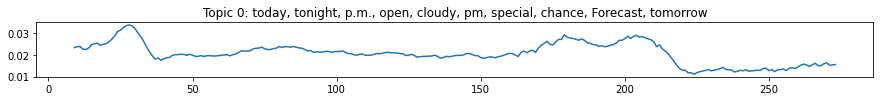

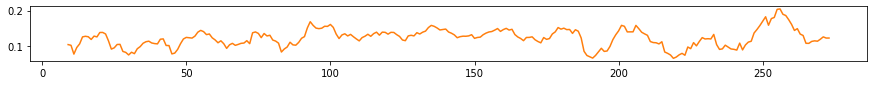

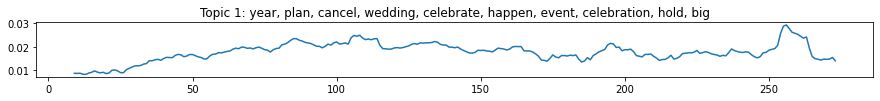

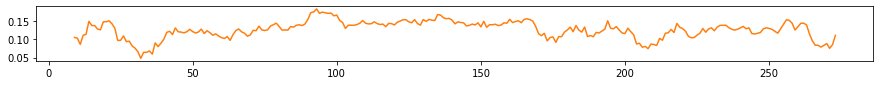

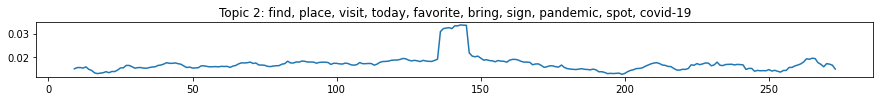

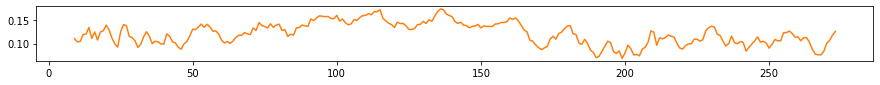

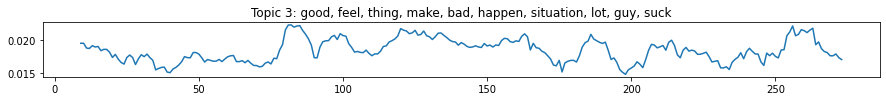

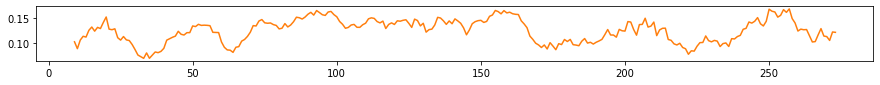

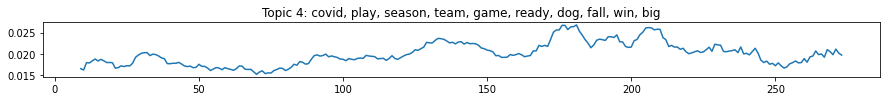

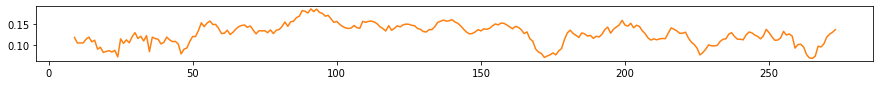

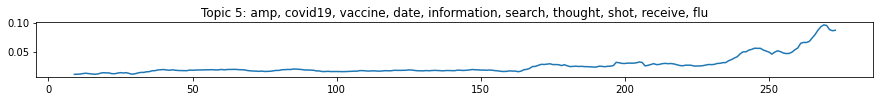

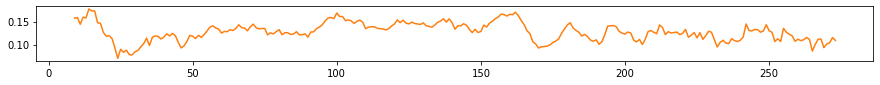

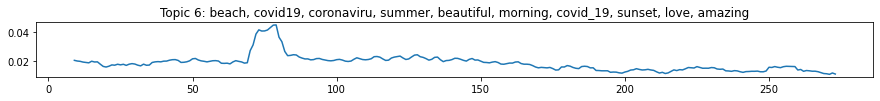

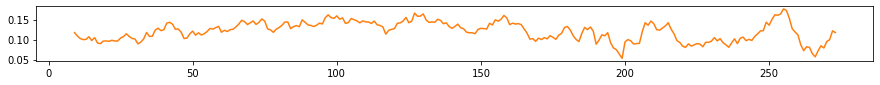

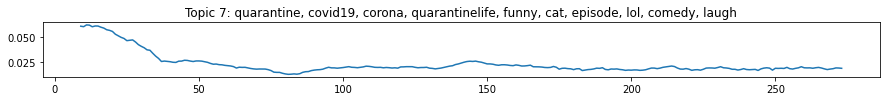

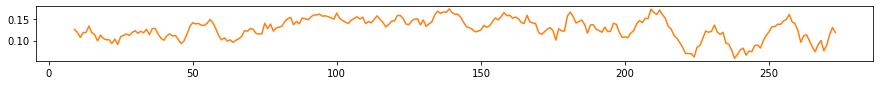

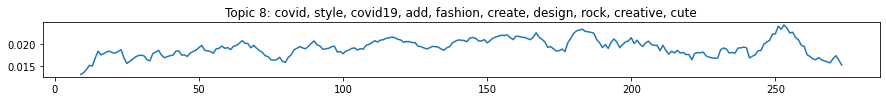

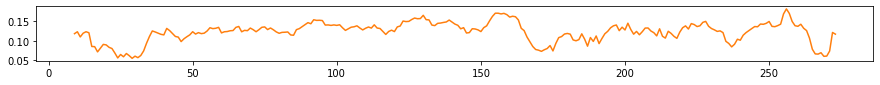

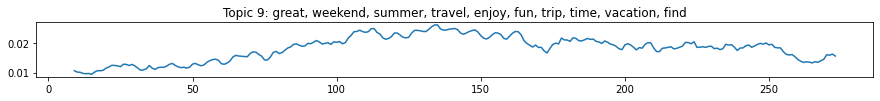

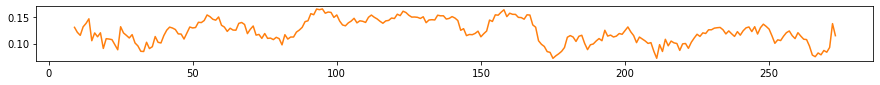

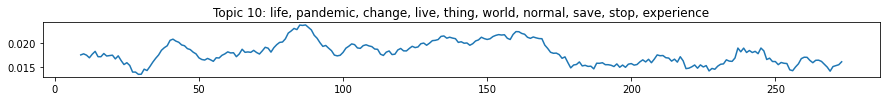

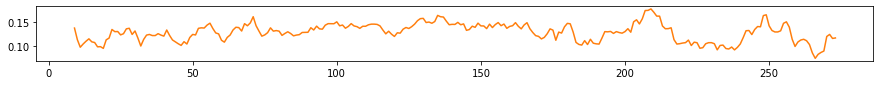

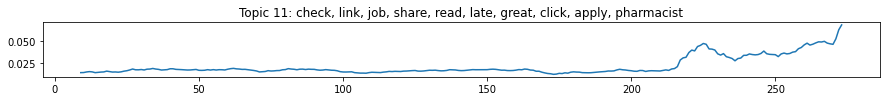

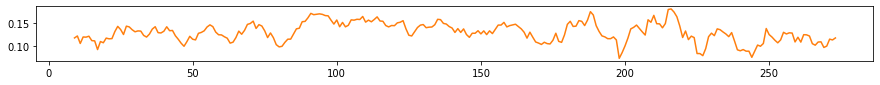

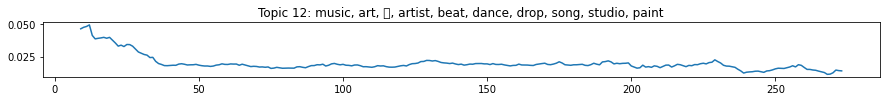

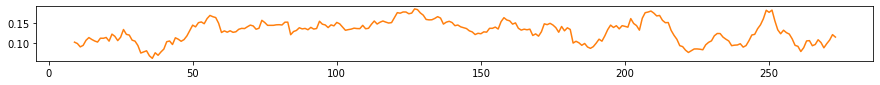

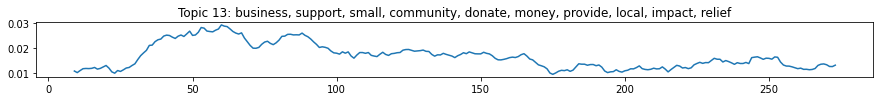

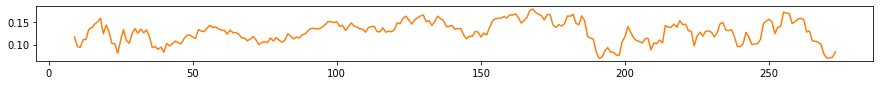

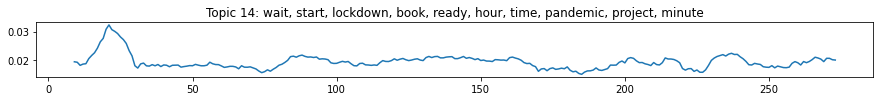

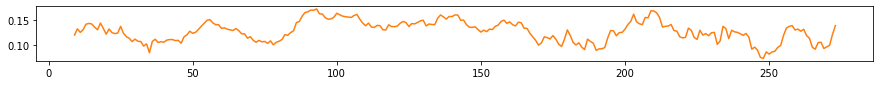

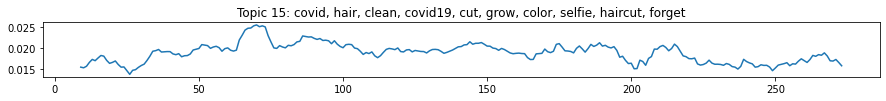

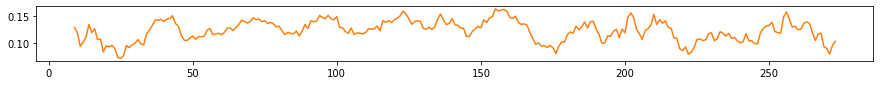

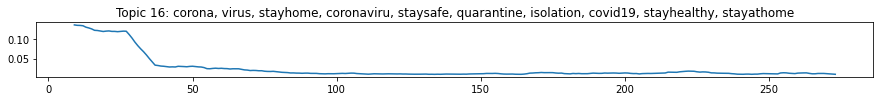

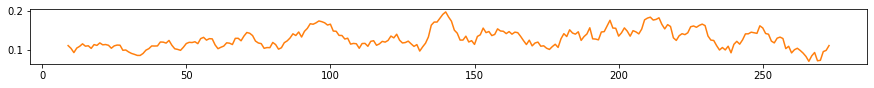

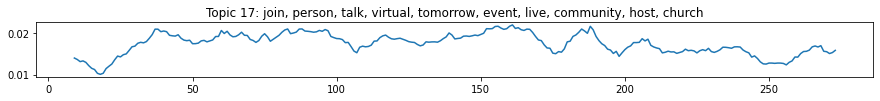

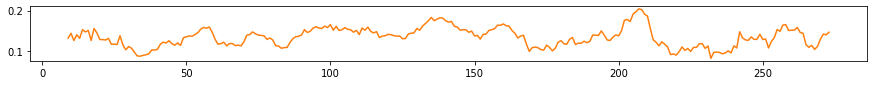

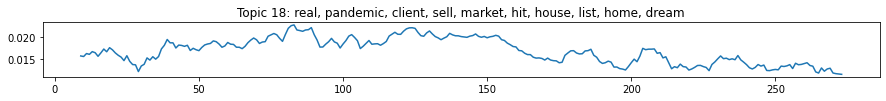

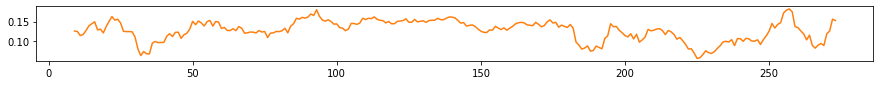

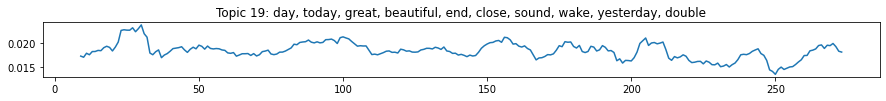

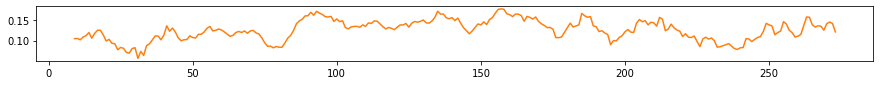

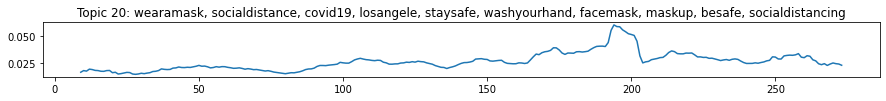

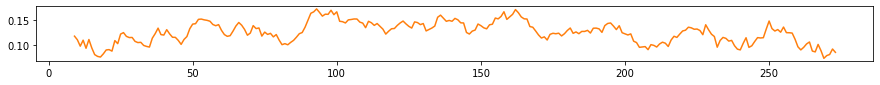

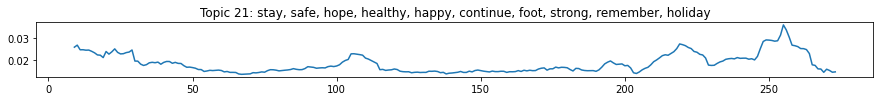

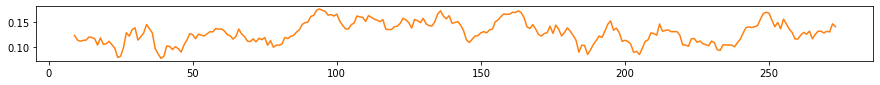

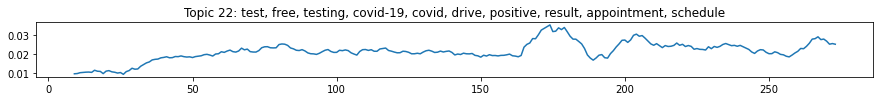

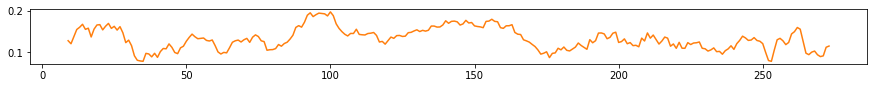

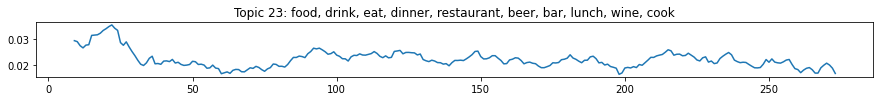

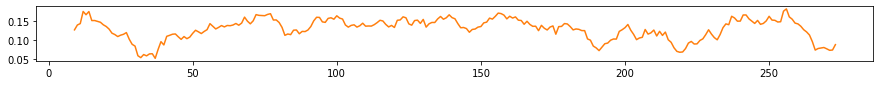

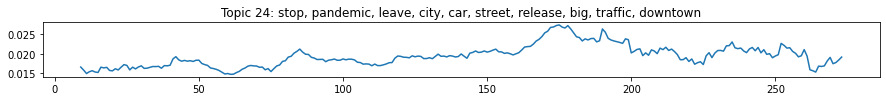

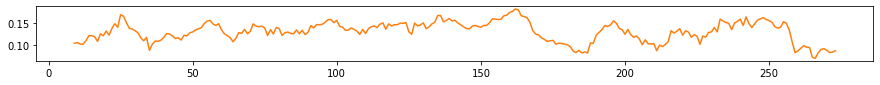

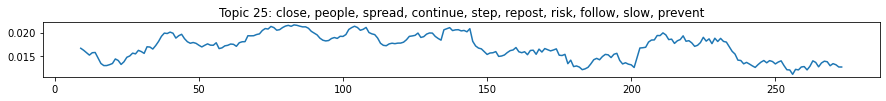

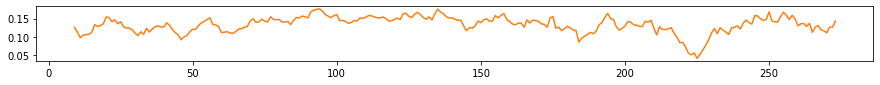

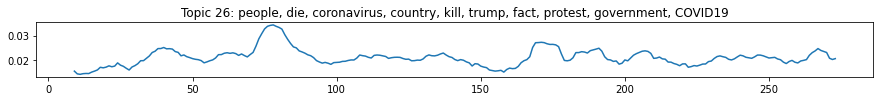

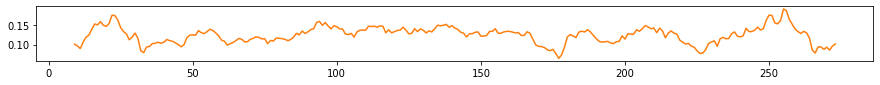

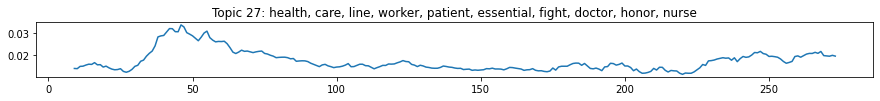

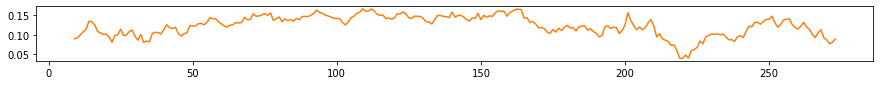

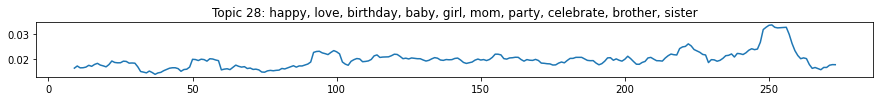

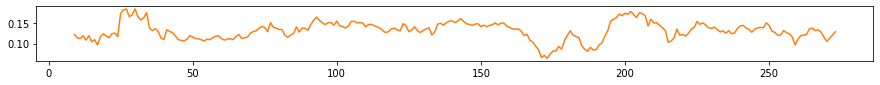

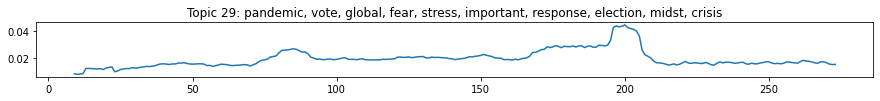

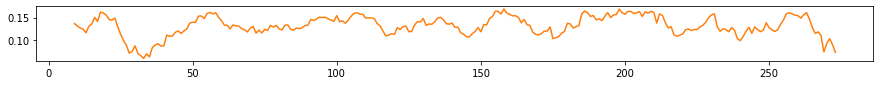

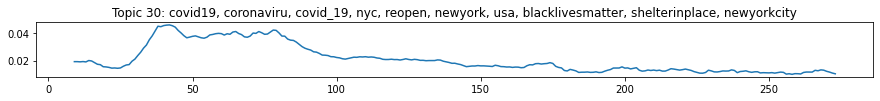

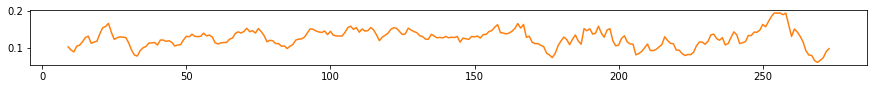

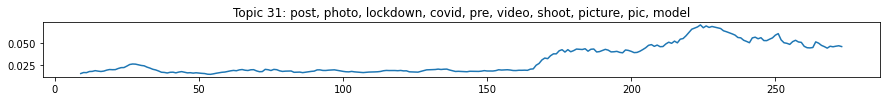

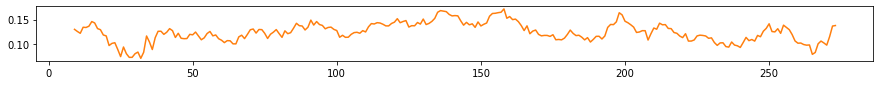

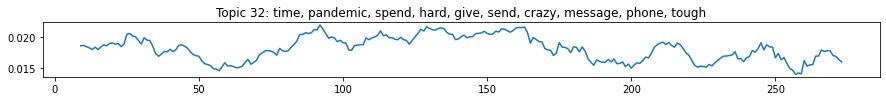

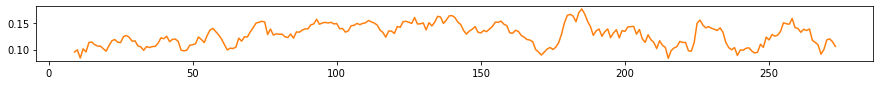

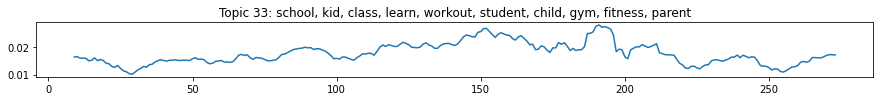

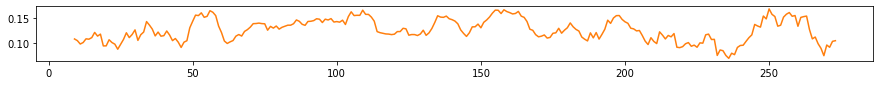

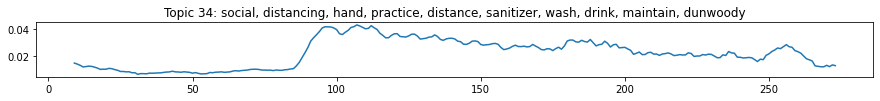

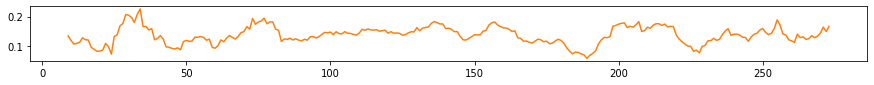

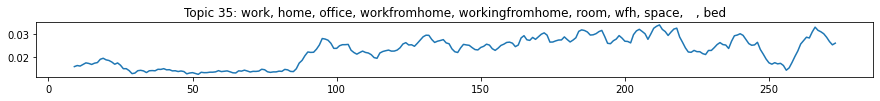

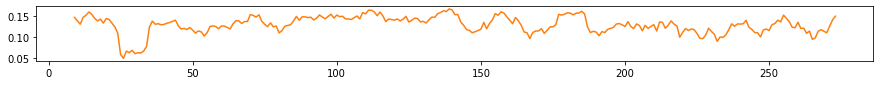

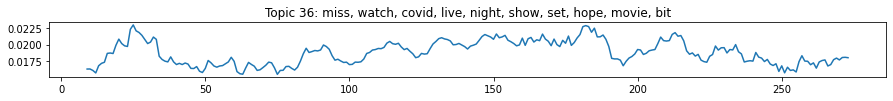

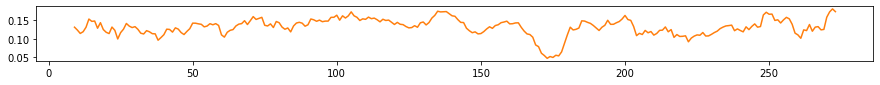

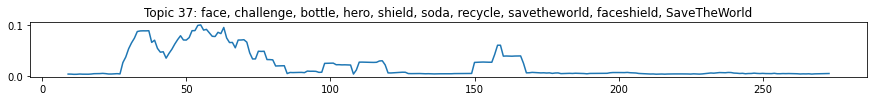

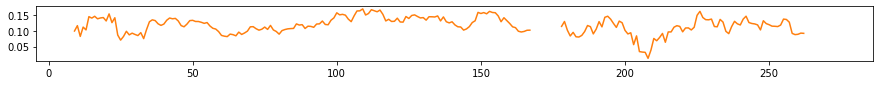

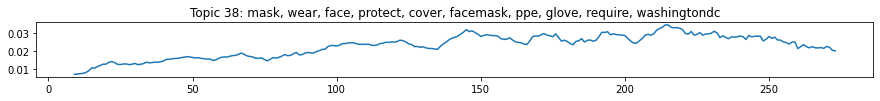

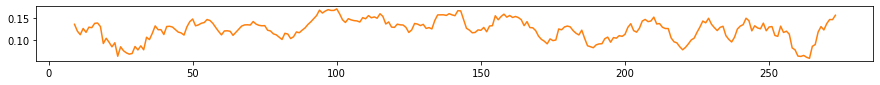

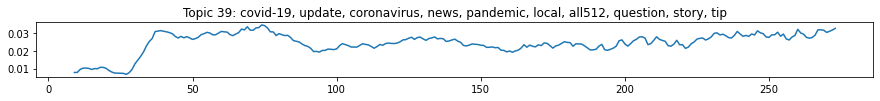

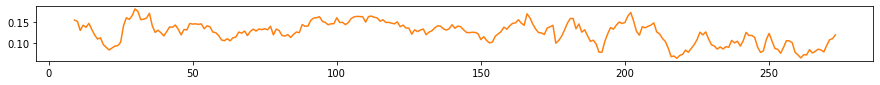

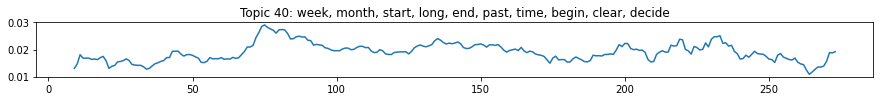

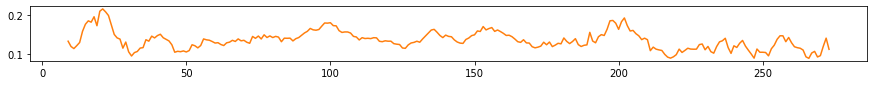

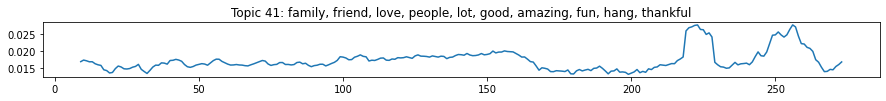

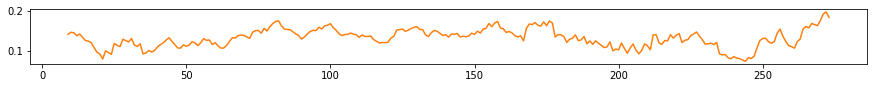

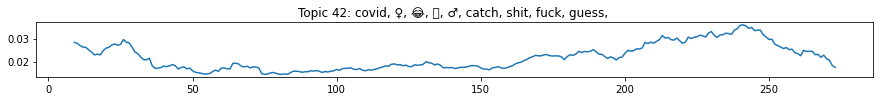

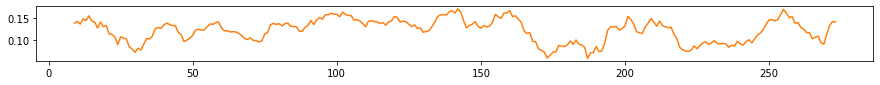

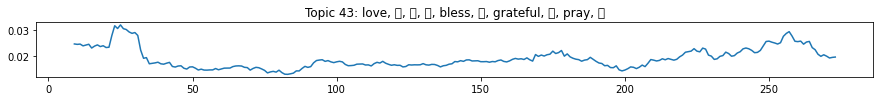

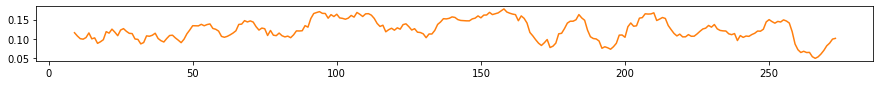

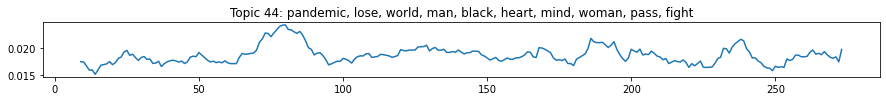

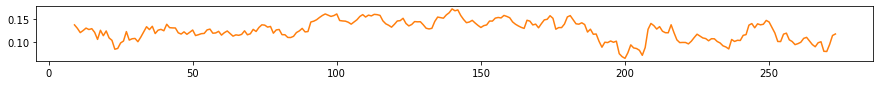

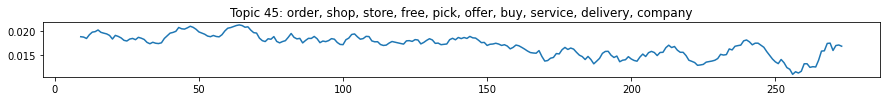

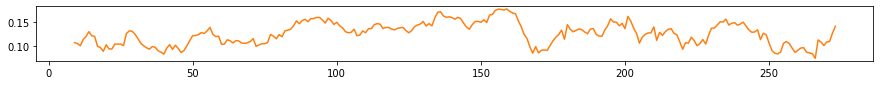

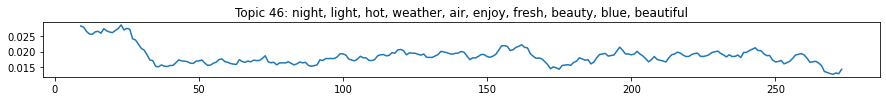

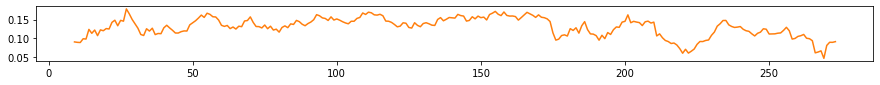

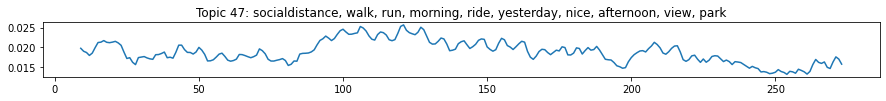

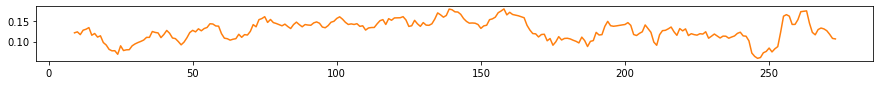

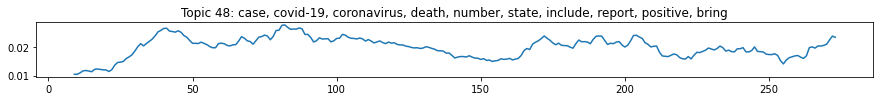

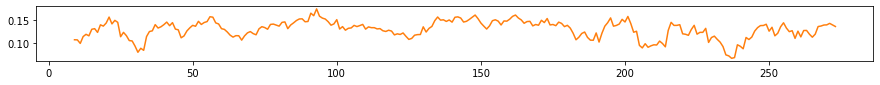

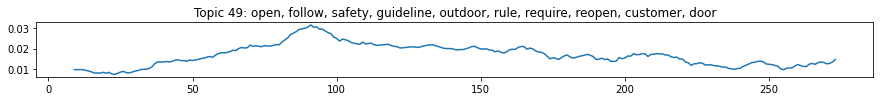

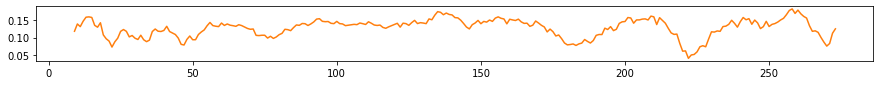

In [183]:
data = day_data_means_c
for i, topic in enumerate(c_topics):
    plt.figure(figsize=(15,1))
    plt.plot(data[topic].rolling(10).mean(), c="C0")
    plt.title(top_10[i])
    plt.show()
    
    plt.figure(figsize=(15,1))
    plt.plot(data[topic+"_sentiment"].rolling(10).mean(), c="C1")
    plt.show()